In [1]:
import pandas as pd
import pyarrow as pa
df = pd.DataFrame({"col": ["a", "b"]}, dtype="string[pyarrow]")
print("Pandas pyarrow test:", df.dtypes)
print("pyarrow version:", pa.__version__)

Pandas pyarrow test: col    string[pyarrow]
dtype: object
pyarrow version: 20.0.0


In [9]:
import dask.dataframe as dd
df = dd.read_csv('../insurance_data.txt', sep='|', assume_missing=True, sample=100000, dtype=dtypes)

In [10]:
import pyarrow
import pandas as pd
import dask
import numpy as np
print("pyarrow:", pyarrow.__version__)
print("pandas:", pd.__version__)
print("dask:", dask.__version__)
print("numpy:", np.__version__)

pyarrow: 20.0.0
pandas: 2.2.2
dask: 2024.9.0
numpy: 1.26.4


In [11]:
# Cell 1: Imports and setup
import dask.dataframe as dd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

os.makedirs('../figures', exist_ok=True)

In [14]:
import pandas as pd
df_sample = pd.read_csv('../insurance_data.txt', sep='|', nrows=10000)
print("Dtypes:\n", df_sample[['cubiccapacity', 'kilowatts', 'mmcode']].dtypes)
print("Sample:\n", df_sample[['cubiccapacity', 'kilowatts', 'mmcode']].head(10))
print("Unique values in cubiccapacity:\n", df_sample['cubiccapacity'].unique())
print("Unique values in kilowatts:\n", df_sample['kilowatts'].unique())
print("Unique values in mmcode:\n", df_sample['mmcode'].unique())

Dtypes:
 cubiccapacity    int64
kilowatts        int64
mmcode           int64
dtype: object
Sample:
    cubiccapacity  kilowatts    mmcode
0           2597        130  44069150
1           2597        130  44069150
2           2597        130  44069150
3           2597        130  44069150
4           2597        130  44069150
5           2597        130  44069150
6           2597        130  44069150
7           2597        130  44069150
8           2597        130  44069150
9           2597        130  44069150
Unique values in cubiccapacity:
 [2597 4921 1870 3984 1995 1596 1781 2521 1149 1597 1598 2459 2700 1968
 1595 2694 2494 1495  996 2237 2148 2488 1796 2309 2398]
Unique values in kilowatts:
 [130 230  75 182 115  88 118 162  55  82 100  80 120 111  76  51 110 108
 135  65  90 102]
Unique values in mmcode:
 [44069150 64092300 54057250 22089200  5036102 22045520  4042080 65030720
 50605200 50610300  5037006 64082300 44004540 64082441 64063540 60058410
 60058415 60058418 60058407 

In [16]:
import dask.dataframe as dd
df = dd.read_csv('../insurance_data.txt', sep='|', assume_missing=True, dtype_backend='pyarrow', sample=100000)
for col in ['cubiccapacity', 'kilowatts', 'mmcode']:
    non_numeric = df[col].map(lambda x: not isinstance(x, (int, float)) and pd.notna(x)).sum().compute()
    print(f"Non-numeric values in {col}: {non_numeric}")

d:\insurance_risk_analytics\venv\Lib\site-packages\dask_expr\_collection.py:4192: UserWarning: 
You did not provide metadata, so Dask is running your function on a small dataset to guess output types. It is possible that Dask will guess incorrectly.
To provide an explicit output types or to silence this message, please provide the `meta=` keyword, as described in the map or apply function that you are using.
  Before: .apply(func)
  After:  .apply(func, meta=('cubiccapacity', 'bool'))

  warnings.warn(meta_warning(meta))


Non-numeric values in cubiccapacity: 0


d:\insurance_risk_analytics\venv\Lib\site-packages\dask_expr\_collection.py:4192: UserWarning: 
You did not provide metadata, so Dask is running your function on a small dataset to guess output types. It is possible that Dask will guess incorrectly.
To provide an explicit output types or to silence this message, please provide the `meta=` keyword, as described in the map or apply function that you are using.
  Before: .apply(func)
  After:  .apply(func, meta=('kilowatts', 'bool'))

  warnings.warn(meta_warning(meta))


Non-numeric values in kilowatts: 0


d:\insurance_risk_analytics\venv\Lib\site-packages\dask_expr\_collection.py:4192: UserWarning: 
You did not provide metadata, so Dask is running your function on a small dataset to guess output types. It is possible that Dask will guess incorrectly.
To provide an explicit output types or to silence this message, please provide the `meta=` keyword, as described in the map or apply function that you are using.
  Before: .apply(func)
  After:  .apply(func, meta=('mmcode', 'bool'))

  warnings.warn(meta_warning(meta))


Non-numeric values in mmcode: 0


In [19]:
df = dd.read_csv('../insurance_data.txt', sep='|', assume_missing=True, sample=100000)
df['cubiccapacity'] = dd.to_numeric(df['cubiccapacity'], errors='coerce').astype('float64')
print("Missing Values in cubiccapacity:", df['cubiccapacity'].isnull().sum().compute())

Missing Values in cubiccapacity: 552


In [4]:
import dask.dataframe as dd
df = dd.read_csv('../insurance_data.txt', sep='|', usecols=['Rebuilt', 'WrittenOff', 'CrossBorder'], 
                 sample=100000, dtype={'Rebuilt': 'object', 'WrittenOff': 'object', 'CrossBorder': 'object'})
df['Rebuilt'] = df['Rebuilt'].fillna('Unknown').astype('string')
df['WrittenOff'] = df['WrittenOff'].fillna('Unknown').astype('string')
df['CrossBorder'] = df['CrossBorder'].fillna('Unknown').astype('string')
print("Rebuilt unique:\n", df['Rebuilt'].unique().compute())
print("WrittenOff unique:\n", df['WrittenOff'].unique().compute())
print("CrossBorder unique:\n", df['CrossBorder'].unique().compute())

Rebuilt unique:
 0    Unknown
0         No
0        Yes
Name: Rebuilt, dtype: string
WrittenOff unique:
 0    Unknown
0         No
0        Yes
Name: WrittenOff, dtype: string
CrossBorder unique:
 0    Unknown
0         No
Name: CrossBorder, dtype: string


In [7]:
import dask.dataframe as dd
import pandas as pd
cols = ['TotalPremium', 'TotalClaims', 'Province', 'CrossBorder', 'Rebuilt', 'WrittenOff']
df = dd.read_csv('../insurance_data.txt', sep='|', usecols=cols, sample=100000, 
                 dtype={'TotalPremium': 'float64', 'TotalClaims': 'float64', 'Province': 'object', 
                        'CrossBorder': 'object', 'Rebuilt': 'object', 'WrittenOff': 'object'})
df['TotalPremium'] = dd.to_numeric(df['TotalPremium'], errors='coerce').astype('float64')
df['TotalClaims'] = dd.to_numeric(df['TotalClaims'], errors='coerce').astype('float64')
df['Province'] = df['Province'].fillna('Unknown').astype('string')
df['CrossBorder'] = df['CrossBorder'].fillna('Unknown').astype('string')
df['Rebuilt'] = df['Rebuilt'].fillna('Unknown').astype('string')
df['WrittenOff'] = df['WrittenOff'].fillna('Unknown').astype('string')
print("Columns:", df.columns.tolist())
print("Data Types:\n", df.dtypes)
print("Missing Values:\n", df.isnull().sum().compute())
print("Descriptive Statistics:\n", df[['TotalPremium', 'TotalClaims']].describe().compute())

Columns: ['Province', 'WrittenOff', 'Rebuilt', 'CrossBorder', 'TotalPremium', 'TotalClaims']
Data Types:
 Province        string[python]
WrittenOff      string[python]
Rebuilt         string[python]
CrossBorder     string[python]
TotalPremium           float64
TotalClaims            float64
dtype: object
Missing Values:
 Province        0
WrittenOff      0
Rebuilt         0
CrossBorder     0
TotalPremium    0
TotalClaims     0
dtype: int64
Descriptive Statistics:
        TotalPremium   TotalClaims
count  1.000098e+06  1.000098e+06
mean   6.190550e+01  6.486119e+01
std    2.302845e+02  2.384075e+03
min   -7.825768e+02 -1.200241e+04
25%    0.000000e+00  0.000000e+00
50%    3.222719e+00  0.000000e+00
75%    4.385965e+01  0.000000e+00
max    6.528260e+04  3.930921e+05


Columns: ['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth', 'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language', 'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province', 'PostalCode', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'mmcode', 'VehicleType', 'RegistrationYear', 'make', 'Model', 'Cylinders', 'cubiccapacity', 'kilowatts', 'bodytype', 'NumberOfDoors', 'VehicleIntroDate', 'CustomValueEstimate', 'AlarmImmobiliser', 'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff', 'Rebuilt', 'Converted', 'CrossBorder', 'NumberOfVehiclesInFleet', 'SumInsured', 'TermFrequency', 'CalculatedPremiumPerTerm', 'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section', 'Product', 'StatutoryClass', 'StatutoryRiskType', 'TotalPremium', 'TotalClaims', 'LossRatio']
Data Types:
 UnderwrittenCoverID           int64
PolicyID                      int64
TransactionMonth             object
IsVATRegistered                bool
Citizenship        

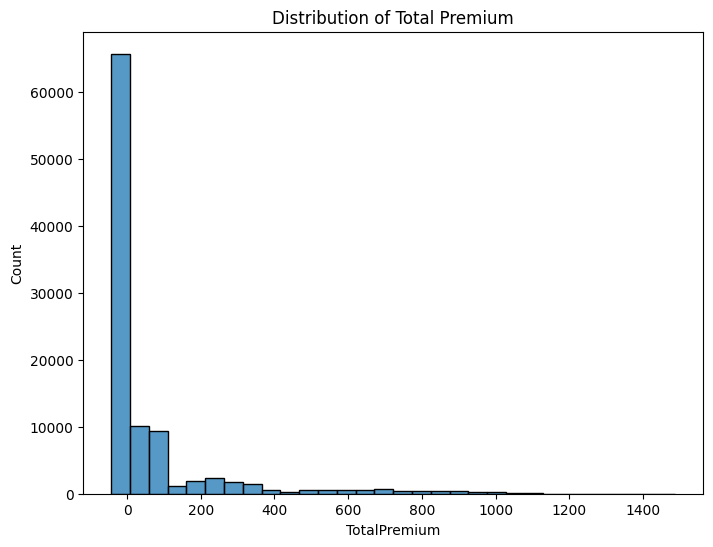

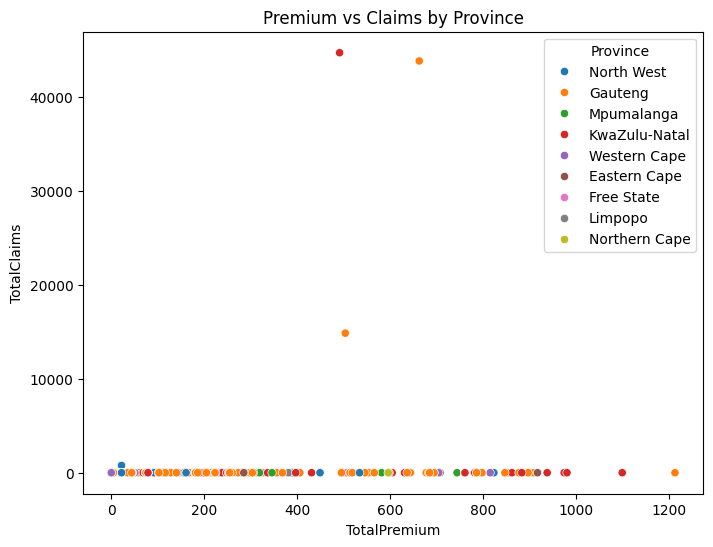

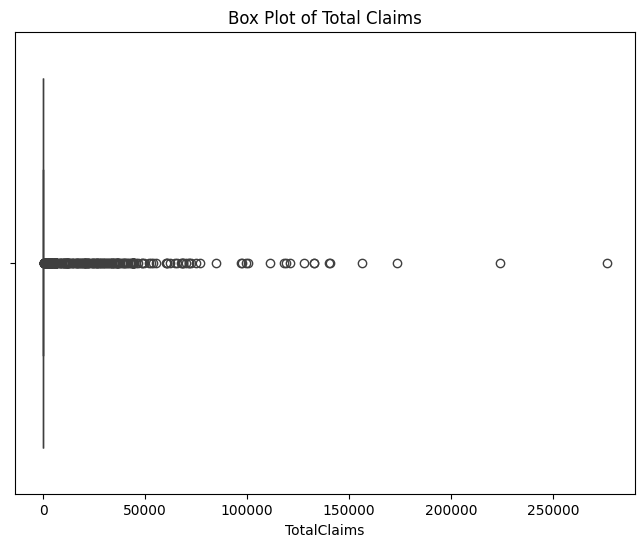

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('../insurance_data.txt', sep='|', nrows=100000)
df['TotalPremium'] = pd.to_numeric(df['TotalPremium'], errors='coerce')
df['TotalClaims'] = pd.to_numeric(df['TotalClaims'], errors='coerce')
df['LossRatio'] = df['TotalClaims'] / df['TotalPremium'].replace(0, float('nan')).fillna(0)
print("Columns:", df.columns.tolist())
print("Data Types:\n", df.dtypes)
print("Missing Values:\n", df.isnull().sum())
print("Descriptive Statistics:\n", df[['TotalPremium', 'TotalClaims']].describe())
print("Overall Loss Ratio:", df['LossRatio'].mean())
print("Province Loss Ratio:\n", df.groupby('Province')['LossRatio'].mean())
# Histogram
plt.figure(figsize=(8, 6))
sns.histplot(df['TotalPremium'].dropna(), bins=30)
plt.title('Distribution of Total Premium')
plt.savefig('../figures/total_premium_histogram.png')
plt.show()
# Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='TotalPremium', y='TotalClaims', hue='Province', data=df.sample(frac=0.01))
plt.title('Premium vs Claims by Province')
plt.savefig('../figures/premium_vs_claims.png')
plt.show()
# Box Plot
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['TotalClaims'].dropna())
plt.title('Box Plot of Total Claims')
plt.savefig('../figures/claims_boxplot.png')
plt.show()

In [11]:
# Cell 2: Load data with Pandas
df = pd.read_csv('../insurance_data.txt', sep='|', nrows=100000)
df['TotalPremium'] = pd.to_numeric(df['TotalPremium'], errors='coerce')
df['TotalClaims'] = pd.to_numeric(df['TotalClaims'], errors='coerce')
df['Province'] = df['Province'].astype('str')
print("Columns:", df.columns.tolist())
print("Data Types:\n", df.dtypes)
print("Missing Values:\n", df.isnull().sum())
print("Descriptive Statistics:\n", df[['TotalPremium', 'TotalClaims']].describe())

Columns: ['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth', 'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language', 'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province', 'PostalCode', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'mmcode', 'VehicleType', 'RegistrationYear', 'make', 'Model', 'Cylinders', 'cubiccapacity', 'kilowatts', 'bodytype', 'NumberOfDoors', 'VehicleIntroDate', 'CustomValueEstimate', 'AlarmImmobiliser', 'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff', 'Rebuilt', 'Converted', 'CrossBorder', 'NumberOfVehiclesInFleet', 'SumInsured', 'TermFrequency', 'CalculatedPremiumPerTerm', 'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section', 'Product', 'StatutoryClass', 'StatutoryRiskType', 'TotalPremium', 'TotalClaims']
Data Types:
 UnderwrittenCoverID           int64
PolicyID                      int64
TransactionMonth             object
IsVATRegistered                bool
Citizenship                  obj

In [13]:
# Cell 3: Loss Ratio
df['LossRatio'] = df['TotalClaims'] / df['TotalPremium'].replace(0, float('nan')).fillna(0)
print("Overall Loss Ratio:", df['LossRatio'].mean())
province_loss_ratio = df.groupby('Province')['LossRatio'].mean()
print(province_loss_ratio)

Overall Loss Ratio: inf
Province
Eastern Cape     0.066362
Free State       0.101270
Gauteng               inf
KwaZulu-Natal         inf
Limpopo          0.380956
Mpumalanga       0.491758
North West       0.154391
Northern Cape    0.309341
Western Cape          inf
Name: LossRatio, dtype: float64


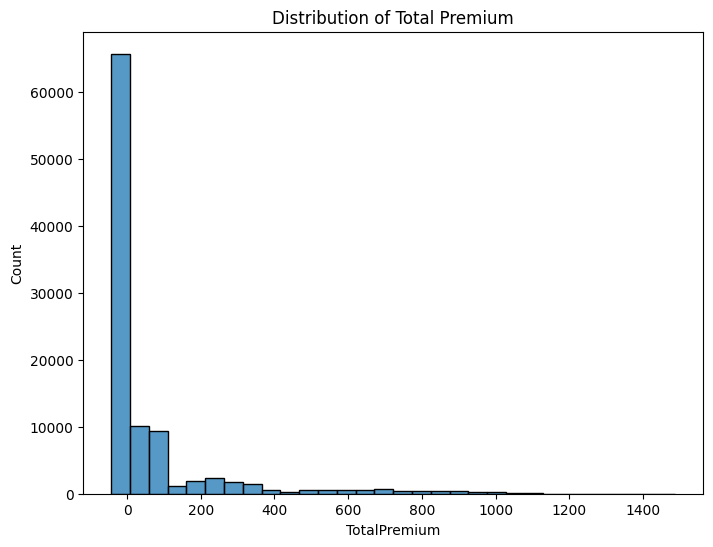

In [15]:
# Cell 4: Histogram
plt.figure(figsize=(8, 6))
sns.histplot(df['TotalPremium'].dropna(), bins=30)
plt.title('Distribution of Total Premium')
plt.savefig('../figures/total_premium_histogram.png')
plt.show()

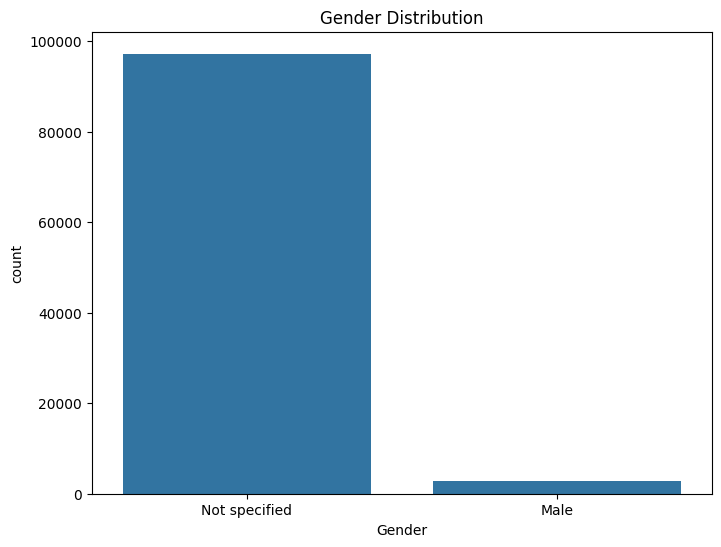

In [26]:
# Cell 5: Gender Bar Chart
plt.figure(figsize=(8, 6))
sns.countplot(x=df['Gender'])
plt.title('Gender Distribution')
plt.savefig('../figures/gender_distribution.png')
plt.show()

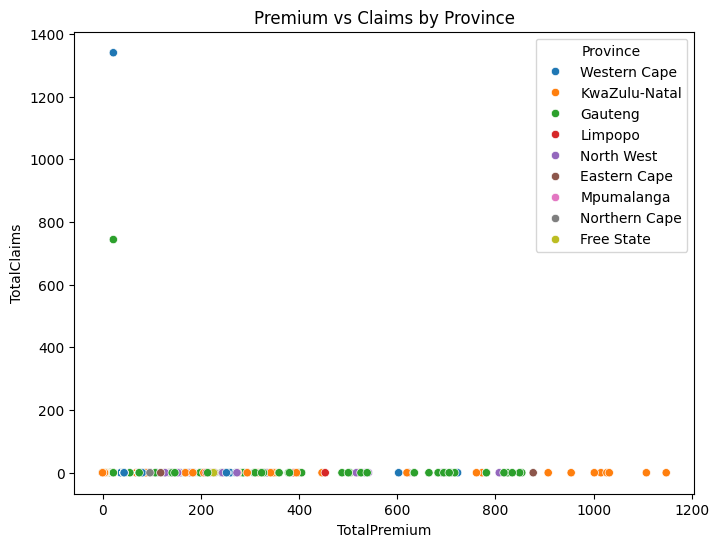

In [ ]:

# Cell 6: Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='TotalPremium', y='TotalClaims', hue='Province', data=df.sample(frac=0.01))
plt.title('Premium vs Claims by Province')
plt.savefig('../figures/premium_vs_claims.png')
plt.show()

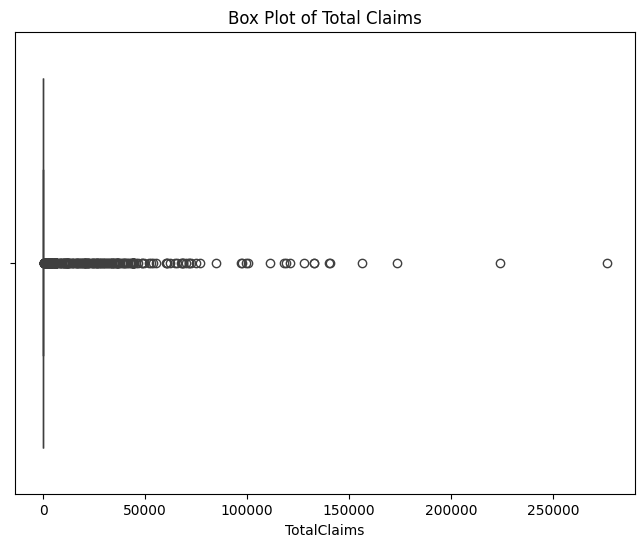

In [ ]:





# Cell 7: Box Plot
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['TotalClaims'].dropna())
plt.title('Box Plot of Total Claims')
plt.savefig('../figures/claims_boxplot.png')
plt.show()


In [29]:


# Cell 8: Temporal Trends
try:
    df['TransactionMonth'] = dd.to_datetime(df['TransactionMonth'])
    monthly_claims = df.groupby(df['TransactionMonth'].dt.to_period('M'))['TotalClaims'].sum().compute()
    monthly_claims.plot(title='Monthly Total Claims')
    plt.savefig('../figures/monthly_claims.png')
    plt.show()
except Exception as e:
    print(f"Error parsing TransactionMonth: {e}")

Error parsing TransactionMonth: 'Series' object has no attribute 'compute'


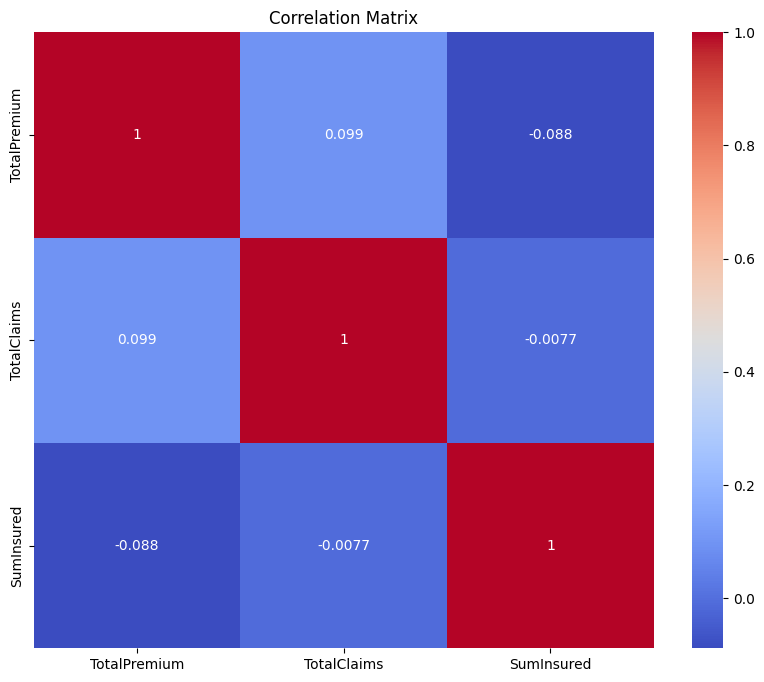

In [30]:
# Cell 9: Correlation Matrix
corr = df[['TotalPremium', 'TotalClaims', 'SumInsured']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.savefig('../figures/correlation_matrix.png')
plt.show()

In [31]:
print("CapitalOutstanding unique values:", df['CapitalOutstanding'].unique()[:10])
print("CapitalOutstanding types:", df['CapitalOutstanding'].apply(type).value_counts())
print("CrossBorder unique values:", df['CrossBorder'].unique()[:10])
print("CrossBorder types:", df['CrossBorder'].apply(type).value_counts())

CapitalOutstanding unique values: [119300. 161000.  52700. 127300. 146800. 140400. 208800.  86300.  48100.
  62400.]
CapitalOutstanding types: CapitalOutstanding
<class 'float'>    100000
Name: count, dtype: int64
CrossBorder unique values: [nan]
CrossBorder types: CrossBorder
<class 'float'>    100000
Name: count, dtype: int64


In [32]:
# Cell 1: Install DVC
!pip install dvc

# Cell 2: Initialize DVC
!dvc init

# Cell 3: Create task-dvc branch
!git checkout -b task-dvc

# Cell 4: Track data with DVC
!dvc add ../insurance_data.txt

# Cell 5: Commit DVC files
!git add ../insurance_data.txt.dvc ../.dvcignore
!git commit -m "Tracked data with DVC"

# Cell 6: Push changes
!git push origin task-dvc


[notice] A new release of pip available: 22.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: failed to initiate DVC - d:\insurance_risk_analytics\notebooks is not tracked by any supported SCM tool (e.g. Git). Use `--no-scm` if you don't want to use any SCM or `--subdir` if initializing inside a subdirectory of a parent SCM repository.
fatal: a branch named 'task-dvc' already exists



To track the changes with git, run:

	git add '..\insurance_data.txt.dvc' '..\.dvc\.gitignore'

To enable auto staging, run:

	dvc config core.autostage true


⠋ Checking graph

fatal: pathspec '../.dvcignore' did not match any files


On branch task-eda
Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   ../figures/claims_boxplot.png
	modified:   ../figures/correlation_matrix.png
	modified:   ../figures/gender_distribution.png
	modified:   ../figures/premium_vs_claims.png
	modified:   ../figures/total_premium_histogram.png
	modified:   eda.ipynb

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	../.dvc/
	../insurance_data.txt.dvc

no changes added to commit (use "git add" and/or "git commit -a")


remote: 
remote: Create a pull request for 'task-dvc' on GitHub by visiting:        
remote:      https://github.com/Abeni5/insurance_risk_analytics/pull/new/task-dvc        
remote: 
To https://github.com/Abeni5/insurance_risk_analytics.git
 * [new branch]      task-dvc -> task-dvc
